In [ ]:
import pandas as pd

df = pd.read_csv("Atividade_Cap_14_produtos_agricolas.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
# resumo da estrutura da base de dados (Análise exploratória)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
# estatísticas básicas de cada coluna numérica
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
# quantos valores faltam em cada coluna
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

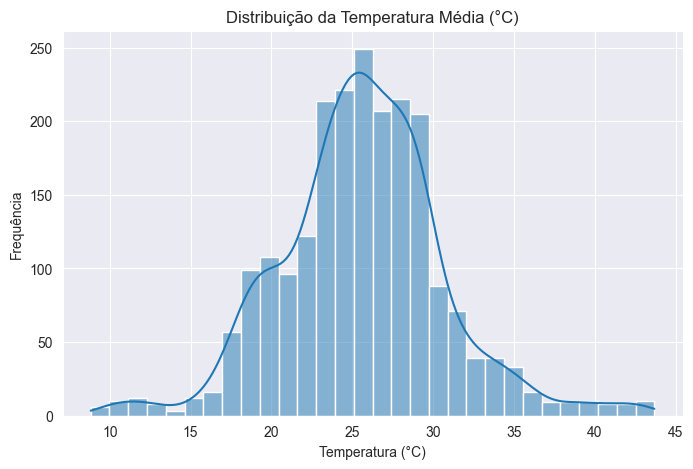

In [ ]:
# Análise Descritiva (Distribuição da Temperatura Média)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df["temperature"], kde=True, bins=30)
plt.title("Distribuição da Temperatura Média (°C)")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

### Gráfico 1 – Distribuição da Temperatura Média

O histograma apresenta a distribuição da temperatura média nas regiões analisadas. Observa-se que a maioria das amostras está concentrada entre 20°C e 30°C, com um pico por volta de 25°C. Isso indica que grande parte das culturas registradas na base são cultivadas em regiões de clima moderado a quente.

A curva azul (KDE) representa a densidade dos dados e mostra que há uma concentração natural nesse intervalo, com poucos casos em extremos de temperatura, como abaixo de 15°C ou acima de 35°C.

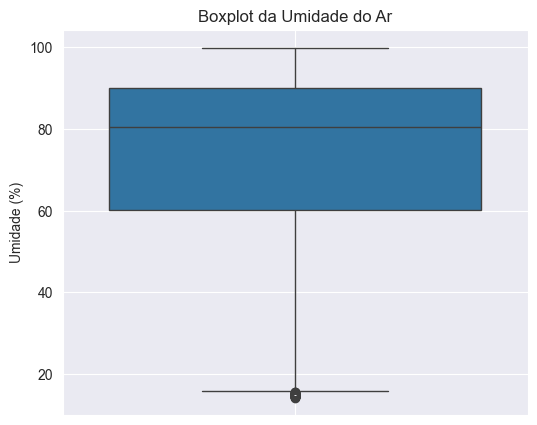

In [ ]:
# Análise Descritiva (Boxplot da Umidade do Ar)

plt.figure(figsize=(6, 5))
sns.boxplot(y=df["humidity"])
plt.title("Boxplot da Umidade do Ar")
plt.ylabel("Umidade (%)")
plt.grid(True)
plt.show()

### Gráfico 2 – Boxplot da Umidade do Ar

O boxplot mostra a distribuição da umidade do ar nas regiões agrícolas da base de dados. A maior parte das amostras (50%) apresenta umidade entre 60% e 90%, com a mediana situada em torno de 80%. Isso indica que, em geral, as plantações ocorrem em regiões com clima bastante úmido.

O bigode inferior se estende até cerca de 10%, e há um outlier visível abaixo de 10%, representando regiões com umidade muito baixa e pouco frequentes na base.

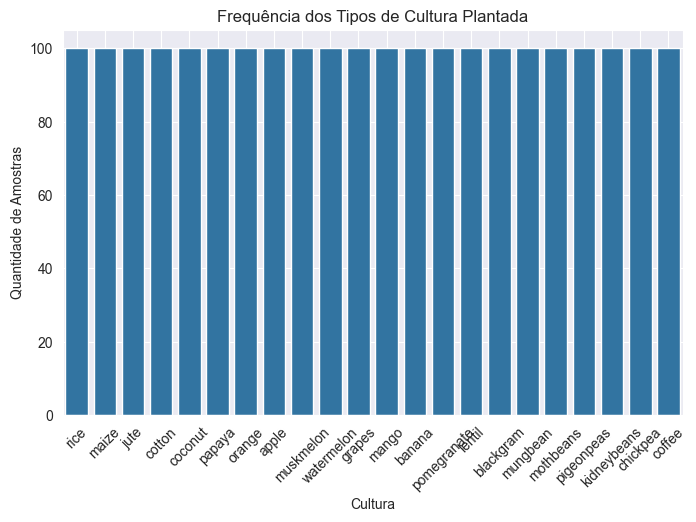

In [ ]:
# Análise Descritiva (Frequência dos Tipos de Cultura Plantada)

plt.figure(figsize=(8, 5))
sns.countplot(x=df["label"], order=df["label"].value_counts().index)
plt.title("Frequência dos Tipos de Cultura Plantada")
plt.xlabel("Cultura")
plt.ylabel("Quantidade de Amostras")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Gráfico 3 – Frequência dos Tipos de Cultura Plantada

O gráfico de barras apresenta a quantidade de amostras para cada tipo de cultura presente na base de dados. Observa-se que todas as culturas aparecem com a mesma frequência, o que indica que o conjunto de dados foi balanceado intencionalmente.

Essa prática é comum em projetos de aprendizado de máquina supervisionado, especialmente em problemas de classificação, para garantir que o modelo aprenda a distinguir todas as classes de forma justa, sem favorecer as mais frequentes.

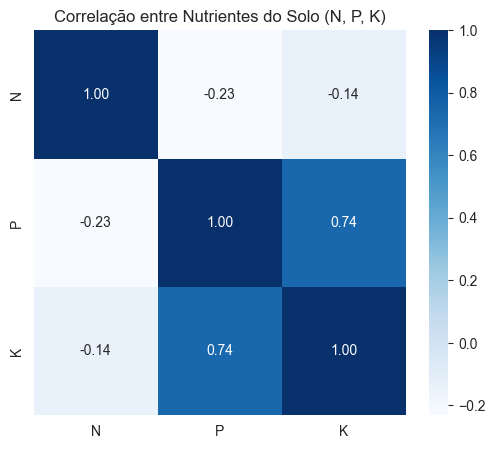

In [ ]:
# Análise Descritiva (Correlação entre Nutrientes do Solo (N, P, K))

plt.figure(figsize=(6, 5))

sns.heatmap(df[["N", "P", "K"]].corr(), annot=True, cmap="Blues", fmt=".2f")

plt.title("Correlação entre Nutrientes do Solo (N, P, K)")
plt.show()

### Gráfico 4 – Correlação entre Nutrientes do Solo (N, P, K)

O heatmap apresenta a correlação entre os nutrientes do solo: nitrogênio (N), fósforo (P) e potássio (K). Os dados mostram uma forte correlação positiva entre fósforo e potássio (0.74), sugerindo que esses dois nutrientes costumam variar juntos nas regiões analisadas.

Por outro lado, o nitrogênio apresenta baixa correlação com os demais nutrientes, o que indica que sua variação é mais independente em relação ao fósforo e potássio.

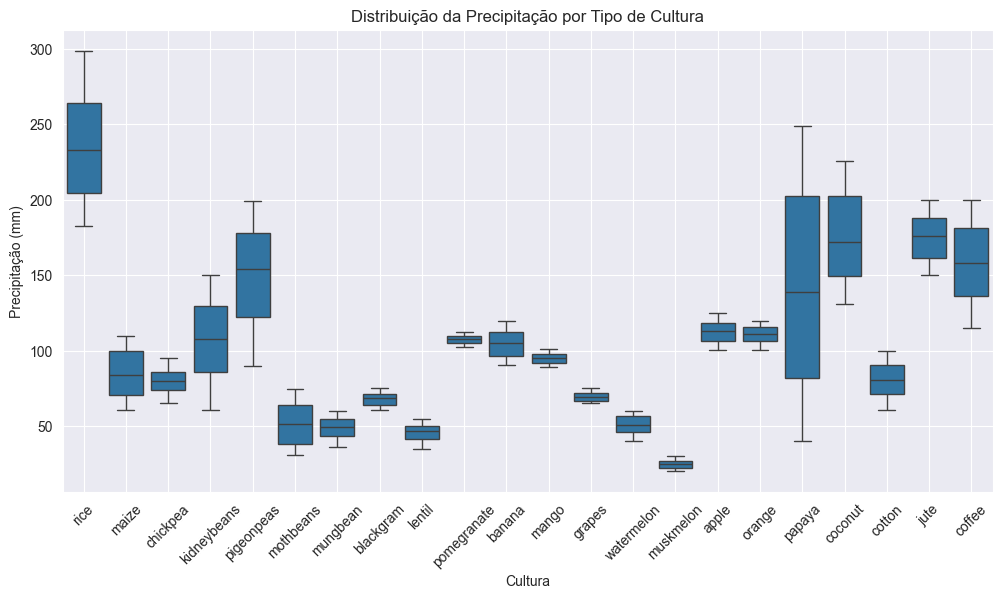

In [ ]:
# Análise Descritiva (Distribuição da Precipitação por Tipo de Cultura)

plt.figure(figsize=(12, 6))
sns.boxplot(x="label", y="rainfall", data=df)
plt.title("Distribuição da Precipitação por Tipo de Cultura")
plt.xlabel("Cultura")
plt.ylabel("Precipitação (mm)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Gráfico 5 – Distribuição da Precipitação por Tipo de Cultura

O boxplot mostra como a precipitação (chuva) varia entre os diferentes tipos de cultura da base de dados. Culturas como arroz (rice), papaya e coconut se destacam por apresentarem valores médios e máximos de precipitação mais elevados, indicando maior adaptação a regiões com maior volume de chuvas.

Além disso, culturas como kidneybeans, pomegranate, coffee e pigeonpeas apresentam considerável variação interna, sendo cultivadas em ambientes com uma faixa mais ampla de precipitação. Por outro lado, culturas como muskmelon, mungbean e mothbeans possuem distribuições mais estreitas, indicando que são cultivadas em regiões com menor pluviosidade e variação.

In [ ]:
# Perfil Ideal de Solo e Clima

perfil_ideal = df.drop(columns="label").mean()
perfil_ideal

N               50.551818
P               53.362727
K               48.149091
temperature     25.616244
humidity        71.481779
ph               6.469480
rainfall       103.463655
dtype: float64

### Perfil Ideal de Solo e Clima

Com base na média de todas as variáveis da base de dados, obtivemos o seguinte perfil ideal para cultivo:

- Nitrogênio (N): 50.55
- Fósforo (P): 53.36
- Potássio (K): 48.15
- Temperatura média: 25.62 °C
- Umidade média: 71.48 %
- pH do solo: 6.47
- Precipitação média: 103.46 mm

Esse perfil representa as condições médias de solo e clima das amostras analisadas e servirá como referência para compararmos com o perfil de três culturas específicas.

In [ ]:
perfil_rice = df[df["label"] == "rice"].drop(columns="label").mean()
perfil_pigeonpeas = df[df["label"] == "pigeonpeas"].drop(columns="label").mean()
perfil_mothbeans = df[df["label"] == "mothbeans"].drop(columns="label").mean()

print("Rice:\n", perfil_rice)
print("\nPigeonpeas:\n", perfil_pigeonpeas)
print("\nMothbeans:\n", perfil_mothbeans)

Rice:
 N               79.890000
P               47.580000
K               39.870000
temperature     23.689332
humidity        82.272822
ph               6.425471
rainfall       236.181114
dtype: float64

Pigeonpeas:
 N               20.730000
P               67.730000
K               20.290000
temperature     27.741762
humidity        48.061633
ph               5.794175
rainfall       149.457564
dtype: float64

Mothbeans:
 N              21.440000
P              48.010000
K              20.230000
temperature    28.194920
humidity       53.160418
ph              6.831174
rainfall       51.198487
dtype: float64


### Comparação entre Perfil Ideal e Perfis de 3 Culturas

Com base nas médias, comparamos o perfil ideal com três culturas específicas: **arroz (rice)**, **feijão-guandu (pigeonpeas)** e **feijão-mungo (mothbeans)**.

**1. Arroz (Rice):**
- Necessita de maior quantidade de nitrogênio (79.89 vs. 50.55) e alta umidade (82.27%).
- Requer muito mais precipitação (236.18 mm) do que a média da base (103.46 mm).
- Tem uma temperatura média de cultivo mais amena (23.69 °C).
- O pH é próximo do ideal (6.43).

**2. Feijão-Guandu (Pigeonpeas):**
- Apresenta baixos níveis de nitrogênio (20.73) e potássio (20.29), mas maior fósforo (67.73).
- Tolera temperaturas mais altas (27.74 °C) e umidades bem mais baixas (48.06%).
- Requer menos precipitação que o arroz, mas ainda acima da média (149.46 mm).
- Prefere solos mais ácidos (pH 5.79).

**3. Feijão-Mungo (Mothbeans):**
- Também apresenta baixos níveis de nutrientes, especialmente potássio (20.23) e fósforo (48.01).
- É cultivado em regiões mais quentes (28.19 °C) e secas, com baixa umidade (53.16%) e muito menos chuva (51.20 mm).
- Prefere solos levemente mais alcalinos (pH 6.83).

**Conclusão:**
- O **arroz** é uma cultura de **clima úmido e chuvoso**.
- O **feijão-guandu** e o **feijão-mungo** são mais adaptados a **climas quentes e menos úmidos**, sendo que o **feijão-mungo** tolera ambientes ainda **mais secos** que o feijão-guandu.

In [ ]:
# (features e rótulo)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Separar as variáveis independentes (X) e a dependente (y)
X = df.drop("label", axis=1)
y = df["label"]

# Transformar as labels (nomes das culturas) em números
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Dividir os dados: 80% treino, 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
# treinar o modelo de Árvore de Decisão

from sklearn.tree import DecisionTreeClassifier

# Criar o modelo
dt_model = DecisionTreeClassifier(random_state=42)

# Treinar
dt_model.fit(X_train, y_train)

# Fazer previsões
y_pred_dt = dt_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Acurácia
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Acurácia da Árvore de Decisão: {accuracy_dt:.2f}")

# Matriz de confusão
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_dt))

# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))

Acurácia da Árvore de Decisão: 0.99
Matriz de Confusão:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  1  0  0 22  0 

### Modelo 1 – Árvore de Decisão

Utilizamos o algoritmo de Árvore de Decisão para prever a cultura agrícola com base nas características de solo e clima.

**Métricas obtidas:**
- **Acurácia:** 99%
- **Matriz de confusão:** apresentou poucos erros, com pequena confusão entre algumas classes como `jute` e `muskmelon`, e `rice` com outras culturas.
- **Relatório de classificação:** a maioria das classes com precisão, recall e F1-score próximos ou iguais a 1.00, indicando um excelente desempenho.

**Análise:**
A Árvore de Decisão demonstrou ser um modelo eficiente para esse conjunto de dados balanceado. Contudo, apresenta uma leve tendência ao sobreajuste, pois o desempenho é quase perfeito — o que pode não se repetir com dados mais diversos.

In [ ]:
# Regressão Logística

from sklearn.preprocessing import StandardScaler

# Instanciar o scaler
scaler = StandardScaler()

# Ajustar e transformar os dados de treino
X_train_scaled = scaler.fit_transform(X_train)

# Transformar os dados de teste
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Treinar

lr_model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Fazer previsões com dados escalados
y_pred_lr = lr_model.predict(X_test_scaled)

In [ ]:
# Avaliação

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Acurácia da Regressão Logística: {accuracy_lr:.2f}")

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_lr))

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))

Acurácia da Regressão Logística: 0.96
Matriz de Confusão:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 20  0  0  0  0  0  0  0  0  1  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 22  

### Modelo 2 – Regressão Logística

Utilizamos o algoritmo de Regressão Logística para prever a cultura agrícola com base nas características de solo e clima.

**Métricas obtidas:**
- **Acurácia:** 96%
- **Relatório de classificação:** desempenho excelente na maioria das classes, com diversas culturas apresentando precisão, recall e F1-score perfeitos.
- Algumas classes, como `rice` (arroz) e `pigeonpeas` (feijão-guandu), apresentaram F1-score mais baixos, indicando maior dificuldade de classificação.

**Análise:**
A Regressão Logística demonstrou ser uma boa opção para esse problema multiclasse, atingindo alta acurácia e excelente desempenho geral. Contudo, a classificação de algumas culturas mais complexas poderia ser aprimorada com técnicas de normalização ou modelos mais robustos.

In [ ]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Criar o modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar
rf_model.fit(X_train, y_train)

# Fazer previsões
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Avaliando modelo

# Acurácia
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia da Random Forest: {accuracy_rf:.2f}")

# Matriz de confusão
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_rf))

# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

Acurácia da Random Forest: 0.99
Matriz de Confusão:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 23  0  0  

### Modelo 3 – Random Forest

Utilizamos o algoritmo de Random Forest para prever a cultura agrícola com base nas características de solo e clima.

**Métricas obtidas:**
- **Acurácia:** 99%
- **Relatório de classificação:** desempenho quase perfeito em praticamente todas as classes, com F1-score de 1.00 na maioria delas.
- Pequenas confusões ainda ocorreram, como no `rice` (arroz), com recall de 0.89 e F1-score de 0.94.

**Análise:**
A Random Forest demonstrou ser o modelo mais robusto até o momento, com desempenho superior aos modelos anteriores. Sua capacidade de combinar múltiplas árvores de decisão permite reduzir overfitting e melhorar a generalização do modelo.

In [ ]:
# K-Nearest Neighbors (KNN)

from sklearn.neighbors import KNeighborsClassifier

# Criar o modelo com K=5 (padrão)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Treinar
knn_model.fit(X_train, y_train)

# Fazer previsões
y_pred_knn = knn_model.predict(X_test)

In [ ]:
# Avaliando modelo

# Acurácia
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Acurácia do KNN: {accuracy_knn:.2f}")

# Matriz de confusão
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_knn))

# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_knn, target_names=le.classes_))

Acurácia do KNN: 0.97
Matriz de Confusão:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 16  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0 22  0  0  0  0  0  0

### Modelo 4 – K-Nearest Neighbors (KNN)

Utilizamos o algoritmo KNN (K=5) para prever a cultura agrícola com base nas características de solo e clima.

**Métricas obtidas:**
- **Acurácia:** 97%
- **Relatório de classificação:** a maioria das classes apresentou desempenho excelente, com F1-score próximo de 1.00.
- Algumas dificuldades foram observadas na classificação do `rice` (arroz), com F1-score de 0.79, e no `jute`, com F1-score de 0.85.

**Análise:**
O KNN apresentou uma performance muito boa, mesmo sem normalização dos dados. Sua sensibilidade à escala pode ter impactado negativamente algumas classes, especialmente `rice`. Ainda assim, é um modelo eficiente e de fácil compreensão.

In [ ]:
# Support Vector Machine (SVM)

from sklearn.svm import SVC

# Criar o modelo
svm_model = SVC(kernel='rbf', random_state=42)

# Treinar
svm_model.fit(X_train, y_train)

# Fazer previsões
y_pred_svm = svm_model.predict(X_test)

In [ ]:
# Avaliando modelo

# Acurácia
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Acurácia do SVM: {accuracy_svm:.2f}")

# Matriz de confusão
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_svm))

# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))

Acurácia do SVM: 0.96
Matriz de Confusão:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 16  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  3  0  0 21  0  0  0  0  0  0

### Modelo 5 – Support Vector Machine (SVM)

Utilizamos o algoritmo SVM com kernel radial (RBF) para prever a cultura agrícola com base nas características de solo e clima.

**Métricas obtidas:**
- **Acurácia:** 96%
- **Relatório de classificação:** a maioria das classes apresentou excelente desempenho, com F1-score de 1.00 em várias culturas.
- Algumas dificuldades ocorreram na classificação do `rice` (arroz), com F1-score de 0.79, e em culturas como `jute` e `lentil`.

**Análise:**
O SVM demonstrou ser um modelo eficaz, mas sensível à escala dos dados. O desempenho poderia ser ainda melhor com técnicas de **normalização** ou ajuste de hiperparâmetros. Ainda assim, obteve uma excelente acurácia e boa generalização.

## Conclusão Geral da Atividade

Nesta atividade, realizamos uma análise completa de uma base de dados relacionada a condições de solo, clima e culturas agrícolas. Após a análise exploratória e descritiva, desenvolvemos cinco modelos preditivos distintos para classificar a cultura agrícola com base nas variáveis disponíveis.

### Desempenho dos Modelos

- **Árvore de Decisão:**
  Obteve excelente desempenho com **acurácia de 99%**. Demonstrou capacidade de memorizar bem os padrões do conjunto, mas com leve risco de overfitting.

- **Regressão Logística:**
  Atingiu uma **acurácia de 96%**, mostrando boa generalização. Apresentou mais dificuldades nas culturas com características mais próximas, como `rice` (arroz).

- **Random Forest:**
  Foi o **modelo com melhor desempenho**, com **acurácia de 99%** e F1-score praticamente perfeito em quase todas as classes. Mostrou-se robusto e menos suscetível ao overfitting em relação à Árvore de Decisão.

- **K-Nearest Neighbors (KNN):**
  Alcançou **acurácia de 97%**, com excelente desempenho geral. No entanto, apresentou dificuldades com algumas classes, especialmente `rice`, evidenciando a necessidade de normalização para melhorar a performance.

- **Support Vector Machine (SVM):**
  Obteve **acurácia de 96%**, com excelente desempenho em várias classes. Demonstrou ser sensível à escala dos dados, especialmente nas culturas mais difíceis de distinguir, como `rice` e `jute`.

### Considerações Finais

De forma geral, todos os modelos apresentaram **desempenho muito satisfatório**, destacando a separabilidade natural das classes na base de dados. A **Random Forest** se destacou como a melhor opção para esse tipo de problema, conciliando alta precisão com robustez.

Modelos como a **Regressão Logística**, **KNN** e **SVM** podem se beneficiar de técnicas de **normalização ou padronização** das variáveis, que não foram aplicadas nesta atividade, mas que poderiam aprimorar ainda mais os resultados.